In [1]:
# Modeing of Solar Energy power generation measured at Bayern state stations with Regression and Neural Network Models

In [2]:
# import module
import pandas as pd

# instantiate df_solar_energy
df_solar_energy = pd.read_csv('../Dataset/preprocessed_data/df_solar_energy_2015_2023.csv',index_col='Unnamed: 0',parse_dates=['date'])

# head
df_solar_energy.head()


,date,03668_FD_STRAHL,03668_FG_STRAHL,03668_SD_STRAHL,05792_FD_STRAHL,05792_FG_STRAHL,05792_SD_STRAHL,05856_FD_STRAHL,05856_FG_STRAHL,05856_SD_STRAHL,...,02290_FG_STRAHL,02290_SD_STRAHL,05404_FD_STRAHL,05404_FG_STRAHL,05404_SD_STRAHL,Bruttoleistung,Nettoleistung,Act_in_MW,Bruttoleistung_kumulativ,Nettoleistung_kumulativ
0,2015-01-01,188.0,188.0,0.0,170.25,694.0,8.4,214.0,214.0,0.0,...,611.0,7.7,365.0,426.0,1.9,302.870,282.375,2807.7,1.094212e+07,1.013617e+07
1,2015-01-02,76.0,76.0,0.0,204.75,383.0,2.8,251.0,259.0,0.1,...,414.0,2.6,233.0,281.0,2.0,926.050,782.540,2813.0,1.094304e+07,1.013695e+07
2,2015-01-03,108.0,108.0,0.0,199.25,343.0,1.2,297.0,316.0,0.3,...,265.0,0.8,194.0,196.0,0.0,20.230,20.230,6713.3,1.094307e+07,1.013697e+07
3,2015-01-04,232.0,233.0,0.0,195.25,252.0,0.0,206.0,207.0,0.0,...,274.0,1.0,182.0,183.0,0.0,0.000,0.000,4321.5,1.094307e+07,1.013697e+07
4,2015-01-05,157.0,485.0,6.2,208.75,591.0,2.9,223.0,223.0,0.0,...,457.0,3.5,344.0,392.0,1.8,502.845,476.850,20532.6,1.094357e+07,1.013745e+07


In [3]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.layers import GRU, LSTM
from keras.layers import Reshape
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
# instantiate aim and train datasets
# use Boolean mask method
mask_solar_energy = (df_solar_energy['date'] >= '2015-01-01') & (df_solar_energy['date'] <= '2022-12-31')
mask_aim = df_solar_energy['date'] >= '2023-01-01'

# assign mask to aim and train datasets
df_aim = df_solar_energy.loc[mask_aim,:]
df_solar_energy_2022 = df_solar_energy.loc[mask_solar_energy,:]

display(df_aim.shape)
display(df_solar_energy_2022.shape)

(365, 24)

(2922, 24)

In [5]:
df_aim.head()

,date,03668_FD_STRAHL,03668_FG_STRAHL,03668_SD_STRAHL,05792_FD_STRAHL,05792_FG_STRAHL,05792_SD_STRAHL,05856_FD_STRAHL,05856_FG_STRAHL,05856_SD_STRAHL,...,02290_FG_STRAHL,02290_SD_STRAHL,05404_FD_STRAHL,05404_FG_STRAHL,05404_SD_STRAHL,Bruttoleistung,Nettoleistung,Act_in_MW,Bruttoleistung_kumulativ,Nettoleistung_kumulativ
2922,2023-01-01,253.0,308.0,2.3,181.0,662.0,7.8,189.0,537.0,7.5,...,597.0,7.5,182.0,526.0,7.6,7616.334,7035.664,66402.6,1.863658e+07,1.703851e+07
2923,2023-01-02,251.0,357.0,3.2,315.0,581.0,6.4,174.0,498.0,5.6,...,488.0,4.2,236.0,415.0,4.5,21242.411,19217.813,57194.2,1.865782e+07,1.705773e+07
2924,2023-01-03,213.0,394.0,4.3,262.0,263.0,0.0,134.0,134.0,0.0,...,166.0,0.0,172.0,172.0,0.0,6305.035,5681.315,36114.8,1.866413e+07,1.706341e+07
2925,2023-01-04,126.0,134.0,0.0,267.0,396.0,3.0,197.0,197.0,0.0,...,323.0,1.3,231.0,280.0,1.9,6898.329,6231.915,21821.3,1.867103e+07,1.706964e+07
2926,2023-01-05,250.0,336.0,1.7,204.0,229.0,0.0,140.0,141.0,0.0,...,167.0,0.1,109.0,109.0,0.0,6455.189,5840.738,21564.3,1.867748e+07,1.707548e+07


In [6]:
# instantiate target vector and features matrix for train and test datasets
target = df_solar_energy_2022['Act_in_MW']
features = df_solar_energy_2022.drop('Act_in_MW',axis=1)

# instantiate target vector ad features matrix for aim dataset
target_aim = df_aim['Act_in_MW']
features_aim = df_aim.drop('Act_in_MW',axis=1)

# split train dataframe
features_train,features_test,target_train,target_test = train_test_split(features, target, random_state=42, test_size = 0.1)

In [7]:
# instantiate year,month and day columns with date function

def date(df) :
    
    """
    instantiate three year,month and day columns and drop date column
    
    Args: 
    df(pd.DataFrame) : features DataFrame with date column
    
    Return:
    df : features DataFrame with three year,month and day new columns and without date column
    
    """
    
    # instantiate month,year and day columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    # drop date column
    df = df.drop('date',axis=1)
    return df

In [8]:
# instantiate base model functions to apply on Train and Test datasets

# models list

    #1 Linear regression model with gridsearch 
   
    #2 Knn regression model with gridsearch 
   
    #3 Ridge_regression model with gridsearch 
   
    #4 lasso regression model with gridsearch 
   
    #5 Support vector machine model with gridsearch 
   
    #6 Decision tree model with gridsearch
    
    #7 Neural_network model using Sequential model
    
    #8 GRU Neural Network model using Sequential model
    
    #9 LSTM Neural Network model using Sequential model
   
    #10 Random forest Regressor with gridsearch    

In [9]:
def model_linear(features_train, target_train, features_test, target_test):
    """
    Train a linear regression model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Linear Regression model with grid search on the test data set   
    """
    
    # Instantiate linear regression
    model_lr = LinearRegression()
    scaler = StandardScaler()
    
    # Instantiate pipeline for linear regression
    pipeline_lr = Pipeline([('scaler', scaler), ('model_lr', model_lr)])
    
    # Define grid search parameters
    search_space_grid = {
        'model_lr__fit_intercept': [True, False],  # Whether to calculate the intercept
        'model_lr__copy_X': [True, False]  # Whether to copy X before fitting
    }
    
    # Instantiate Gridsearch
    model_lr_grid = GridSearchCV(estimator=pipeline_lr,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',  # Use mean absolute error for evaluation
                                 cv=5,
                                 n_jobs=-1)
        
    # Fit the model
    model_lr_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_lr = model_lr_grid.predict(features_test)
    mae_lr = mean_absolute_error(target_test, target_test_pred_lr)
    mse_lr = mean_squared_error(target_test, target_test_pred_lr)
    r2_lr = r2_score(target_test, target_test_pred_lr)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_lr, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('Linear Regressor_predictions.png',dpi=300)
    plt.show()
    
    print('Linear Regression Model Metric Values')
    print('------------------')
    print("MAE on Test Set:", mae_lr)
    print("MSE on Test Set:", mse_lr)
    print("R^2 Score on Test Set:", r2_lr)

In [10]:
def model_knn(features_train, target_train, features_test, target_test):
    """
    Train a KNN model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained KNN model with gridsearch on the test data set      
    
    """
    
   # Instantiate KNN Regressor
    model_knn = KNeighborsRegressor()
    scaler = StandardScaler()
    
    # Instantiate pipeline for KNN Regressor
    pipeline_knn = Pipeline(steps=[('scaler', scaler), ('model_knn', model_knn)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_knn__n_neighbors': [3, 5, 11],  # Number of neighbors to use
        'model_knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    }
    
    # Instantiate GridSearchCV
    model_knn_grid = GridSearchCV(estimator=pipeline_knn,
                                  param_grid=search_space_grid,
                                  scoring='neg_mean_absolute_error',
                                  cv=5,
                                  n_jobs=-1)
    
    # Fit the grid search model
    model_knn_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_knn = model_knn_grid.predict(features_test)
    mae_knn = mean_absolute_error(target_test, target_test_pred_knn)
    mse_knn = mean_squared_error(target_test, target_test_pred_knn)
    r2_knn = r2_score(target_test, target_test_pred_knn)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_knn, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('KNN Regression: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('KNN_regressor_predictions.png',dpi=300)
    plt.show()
    
    # Get the best parameters from the grid search
    best_params = model_knn_grid.best_params_
    
    print('------------------')
    print('KNN Regression Model Metric Values')
    print('------------------')
    print("Best Parameters:", best_params)
    
    print("MAE on Test Set:", mae_knn)
    print("MSE on Test Set:", mse_knn)
    print("R^2 Score on Test Set:", r2_knn)

In [11]:
def model_ridge_regression(features_train, target_train, features_test, target_test):
    """
    Train a Ridge Regression model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Ridge Regression model using grid search on the test data set     
    
    """
    
    # Instantiate Ridge Regression model
    model_ridge = Ridge()
    scaler = StandardScaler()
    
    # Instantiate pipeline for Ridge Regression
    pipeline_ridge = Pipeline(steps=[('scaler', scaler), ('model_ridge', model_ridge)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_ridge__alpha': [100,200, 300],  # Regularization strength
    }
    
    # Instantiate GridSearchCV
    model_ridge_grid = GridSearchCV(estimator=pipeline_ridge,
                                    param_grid=search_space_grid,
                                    scoring='neg_mean_absolute_error',
                                    cv=5,
                                    n_jobs=-1)
    
    # Fit the grid search model
    model_ridge_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_ridge = model_ridge_grid.predict(features_test)
    mae_ridge = mean_absolute_error(target_test,  target_test_pred_ridge)
    mse_ridge = mean_squared_error(target_test,  target_test_pred_ridge)
    r2_ridge = r2_score(target_test,  target_test_pred_ridge)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_ridge, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Ridge Regression: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('ridge_regressor_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Ridge Regression Model Metric Values')
    print('------------------')
    print("Best Parameters:", model_ridge_grid.best_params_)
    
    print("MAE on Test Set:", mae_ridge)
    print("MSE on Test Set:",  mse_ridge)
    print("R^2 Score on Test Set:", r2_ridge)

In [12]:
def model_lasso_regression(features_train, target_train, features_test, target_test):
    """
    Train a Lasso Regression model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Lasso Regression model using grid search on the test data set     
    
    """
  
    # Instantiate Lasso Regression model
    model_lasso = Lasso()
    scaler = StandardScaler()
    
    # Instantiate pipeline for Lasso Regression
    pipeline_lasso = Pipeline(steps=[('scaler', scaler), ('model_lasso', model_lasso)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_lasso__alpha': [10,20,50,100],  # Regularization strength
    }
    
    # Instantiate GridSearchCV
    model_lasso_grid = GridSearchCV(estimator=pipeline_lasso,
                                    param_grid=search_space_grid,
                                    scoring='neg_mean_absolute_error',
                                    cv=5,
                                    n_jobs=-1)
    
    # Fit the grid search model
    model_lasso_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_lasso = model_lasso_grid.predict(features_test)
    mae_lasso = mean_absolute_error(target_test,  target_test_pred_lasso)
    mse_lasso = mean_squared_error(target_test,  target_test_pred_lasso)
    r2_lasso = r2_score(target_test,  target_test_pred_lasso)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_lasso, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Lasso Regression: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('lasso_regression_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Lasso Regression Model Metric Values')
    print('------------------')
    print("Best Parameters:", model_lasso_grid.best_params_)
    
    print("MAE on Test Set:", mae_lasso)
    print("MSE on Test Set:",  mse_lasso)
    print("R^2 Score on Test Set:", r2_lasso)

In [13]:
def model_svm(features_train, target_train, features_test, target_test):
    """
    Train a Support Vector Machine (SVM) Regressor model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
        
    Output:
        Metric values for the trained Support Vector Machine (SVM) model using grid search on the test data set     
    
    """
    # Instantiate SVR
    model_svm = SVR()
    scaler = StandardScaler()
    
    # Instantiate pipeline for SVM
    pipeline_svm = Pipeline(steps=[('scaler', scaler), ('model_svm', model_svm)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_svm__C': [0.1, 1, 10],  # Regularization parameter
        'model_svm__kernel': ['linear', 'rbf'],  # Kernel type
    }
    
    # Instantiate GridSearchCV
    model_svm_grid = GridSearchCV(estimator=pipeline_svm,
                                  param_grid=search_space_grid,
                                  scoring='neg_mean_absolute_error',
                                  cv=5,
                                  n_jobs=-1)
    
    # Fit the grid search model
    model_svm_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_svm = model_svm_grid.predict(features_test)
    mae_svm = mean_absolute_error(target_test,  target_test_pred_svm)
    mse_svm = mean_squared_error(target_test,  target_test_pred_svm)
    r2_svm = r2_score(target_test,  target_test_pred_svm)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_svm, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Support Vector Machine Regressor: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('Support_Vector_Machine_Regressor_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Support Vector Machine Regressor Model Metric Values')
    print('------------------')
    print("Best Parameters:", model_svm_grid.best_params_)
    
    print("MAE on Test Set:", mae_svm)
    print("MSE on Test Set:",  mse_svm)
    print("R^2 Score on Test Set:", r2_svm)

In [14]:
def model_decision_tree(features_train, target_train, features_test, target_test):
    """
    Train a Decision Tree Regressor model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Decision Tree Regressor model using grid search on the test data set    
    
    """
    
    # Instantiate Decision Tree Regressor
    model_dt = DecisionTreeRegressor(random_state=42)
    
    # Instantiate StandardScaler for potential use in pipeline
    scaler = StandardScaler()
    
    # Instantiate pipeline for Decision Tree Regressor
    pipeline_dt = Pipeline(steps=[('scaler', scaler), ('model_dt', model_dt)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_dt__max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
        'model_dt__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'model_dt__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }
    
    # Instantiate GridSearchCV
    model_dt_grid = GridSearchCV(estimator=pipeline_dt,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',  # Use mean absolute error as the scoring metric
                                 cv=5,
                                 n_jobs=-1)
    
    # Fit the grid search model
    model_dt_grid.fit(features_train, target_train)
    
    # Get the best parameters from the grid search
    best_params = model_dt_grid.best_params_      
    
    # Evaluate the model performance
    target_test_pred_dt = model_dt_grid.predict(features_test)
    mae_dt = mean_absolute_error(target_test,  target_test_pred_dt)
    mse_dt = mean_squared_error(target_test,  target_test_pred_dt)
    r2_dt = r2_score(target_test,  target_test_pred_dt)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_dt, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Decision Tree Regressor: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('decision_tree_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Decision Tree Regressor Model Metric Values')
    print('------------------')
    print("Best Parameters:", best_params)
    
    print("MAE on Test Set:", mae_dt)
    print("MSE on Test Set:",  mse_dt)
    print("R^2 Score on Test Set:",r2_dt)

In [15]:
def Neural_network(features_train, target_train, features_test, target_test):
    """
    Train a Neural Network model using Sequential model and evaluate its performance.

    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series

    Output:
        Metric values for the trained Neural Network model on the test data set

    """
    # Normalize the features
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)

    # Define the neural network architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(features_train_scaled, target_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Evaluate the model performance
    target_test_pred_nn = model.predict(features_test_scaled).flatten()
    mae_nn = mean_absolute_error(target_test, target_test_pred_nn)
    mse_nn = mean_squared_error(target_test, target_test_pred_nn)
    r2_nn = r2_score(target_test, target_test_pred_nn)
    
    # Plot training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Neural_network Model Training History')
    plt.savefig('Neural_network_training history_1.png',dpi=300)
    plt.show()
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_nn, color='blue')
    plt.plot(target_test, target_test, color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Neural Network Model Predicted vs Actual')
    plt.savefig('Neural_network_predictions_2.png',dpi=300)
    plt.show()

    # Print model performance metrics
    print('------------------')
    print('Neural Network Model Metric Values')
    print('------------------')
    print("MAE on Test Set:", mae_nn)
    print("MSE on Test Set:", mse_nn)
    print("R^2 Score on Test Set:", r2_nn)

In [16]:
def Neural_network_GRU(features_train, target_train, features_test, target_test):
    """
    Train a GRU Neural Network model using Sequential model and evaluate its performance.

    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series

    Output:
        Metric values for the trained GRU Neural Network model on the test data set

    """
    
    # Normalize the features (excluding datetime column)
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    
    # Reshape input data to include timestep dimension
    features_train_reshaped = features_train_scaled.reshape(features_train_scaled.shape[0], features_train_scaled.shape[1], 1)
    features_test_reshaped = features_test_scaled.reshape(features_test_scaled.shape[0], features_test_scaled.shape[1], 1)

    # Define the neural network architecture
    model = Sequential([
        GRU(64, activation='relu', input_shape=(features_train_reshaped.shape[1], features_train_reshaped.shape[2])),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(features_train_reshaped, target_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Evaluate the model performance
    target_test_pred_nn = model.predict(features_test_reshaped).flatten()
    mae_nn = mean_absolute_error(target_test, target_test_pred_nn)
    mse_nn = mean_squared_error(target_test, target_test_pred_nn)
    r2_nn = r2_score(target_test, target_test_pred_nn)
    
     # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_nn, color='blue')
    plt.plot(target_test, target_test, color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('GRU Neural Network model using Sequential model Predicted vs Actual')
    plt.savefig('GRU_Neural_Network_using_Sequential model_predictions_1.png',dpi=300)
    plt.show()

    # Plot training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('GRU Training History')
    plt.savefig('GRU_Neural_Network_using_Sequential model_training_History_2.png',dpi=300)
    plt.show()
    
    # Print model performance metrics
    print('------------------')
    print('GRU Neural Network Model Metric Values')
    print('------------------')
    print("MAE on Test Set:", mae_nn)
    print("MSE on Test Set:", mse_nn)
    print("R^2 Score on Test Set:", r2_nn)

In [17]:
def Neural_network_LSTM(features_train, target_train, features_test, target_test):
    """
    Train an LSTM Neural Network model using Sequential model and evaluate its performance.

    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series

    Output:
        Metric values for the trained LSTM Neural Network model on the test data set

    """
    
    # Normalize the features (excluding datetime column)
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    
    # Reshape input data to include timestep dimension
    features_train_reshaped = features_train_scaled.reshape(features_train_scaled.shape[0], features_train_scaled.shape[1], 1)
    features_test_reshaped = features_test_scaled.reshape(features_test_scaled.shape[0], features_test_scaled.shape[1], 1)

    # Define the neural network architecture
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(features_train_reshaped.shape[1], features_train_reshaped.shape[2])),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(features_train_reshaped, target_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Evaluate the model performance
    target_test_pred_lstm = model.predict(features_test_reshaped).flatten()
    mae_nn = mean_absolute_error(target_test, target_test_pred_lstm)
    mse_nn = mean_squared_error(target_test, target_test_pred_lstm)
    r2_nn = r2_score(target_test, target_test_pred_lstm)

    # Predictions on test set
    test_predictions = model.predict(features_test_reshaped).flatten()
     # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_lstm, color='blue')
    plt.plot(target_test, target_test, color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('LSTM Neural Network Model Predicted vs Actual')
    plt.savefig('LSTM_Neural_Network_model_predictions_1.png',dpi=300)
    plt.show()
   

    # Evaluate the model performance
    mae_nn = mean_absolute_error(target_test, test_predictions)
    mse_nn = mean_squared_error(target_test, test_predictions)
    r2_nn = r2_score(target_test, test_predictions)

    # Print model performance metrics
    print('------------------')
    print('LSTM Neural Network Model Metric Values')
    print('------------------')
    print("MAE on Test Set:", mae_nn)
    print("MSE on Test Set:", mse_nn)
    print("R^2 Score on Test Set:", r2_nn)

In [18]:
def model_random_forest(features_train, target_train, features_test, target_test):
    """
    Train a Random Forest Regressor model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Random Forest Regressor model with gridsearch on the test data set      
    
    """
    # Instantiate Random Forest Regressor
    model_rf = RandomForestRegressor(random_state=42)
    
    # Define the parameter grid
    search_space_grid = {
        'n_estimators': [800, 1000, 1200],  # Number of trees in the forest
        'max_depth': [None, 10, 20]  # Maximum depth of the tree
    }
    
    # Instantiate GridSearchCV
    model_rf_grid = GridSearchCV(estimator=model_rf,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',
                                 cv=5,
                                 n_jobs=-1)
    
    # Fit the grid search model
    model_rf_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_rf = model_rf_grid.predict(features_test)
    mae_rf = mean_absolute_error(target_test, target_test_pred_rf)
    mse_rf = mean_squared_error(target_test, target_test_pred_rf)
    r2_rf = r2_score(target_test, target_test_pred_rf)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_rf, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest Regressor: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('random_forest_predictions_1.png',dpi=300)
    plt.show()
    
    # Get the best parameters from the grid search
    best_params = model_rf_grid.best_params_
    
    print('------------------')
    print('Random Forest Model Metric Values')
    print('------------------')
    print("Best Parameters:", best_params)
    
    print("MAE on Test Set:", mae_rf)
    print("MSE on Test Set:", mse_rf)
    print("R^2 Score on Test Set:", r2_rf)
    
    # Plot feature importances
    feature_importances = model_rf_grid.best_estimator_.feature_importances_
    feature_names = features_train.columns
    importance_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Features'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Features Importance')
    plt.savefig('random_forest_Features_Importance.png',dpi=300)
    plt.show()

In [19]:
def models_func(features_train,target_train,features_test,target_test):
    """
    Apply model functions using grid search and evaluate their performances.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained models with grid search on the test data set   
    """
    
    #1 apply Linear regression model with gridsearch function on train and test datasets
    model_linear(features_train, target_train, features_test, target_test)
    
    #2 apply Knn regression model with gridsearch function on train and test datasets
    model_knn(features_train,target_train,features_test,target_test)
    
    #3 apply Ridge_regression model with gridsearch function on train and test datasets
    model_ridge_regression(features_train,target_train,features_test,target_test)
    
    #4 apply lasso regression model with gridsearch function on train and test datasets
    model_lasso_regression(features_train,target_train,features_test,target_test)
    
    #5 apply Support vector machine model with gridsearch function on train and test datasets
    model_svm(features_train,target_train,features_test,target_test)
    
    #6 apply Decision tree model with gridsearch function on train and test datasets
    model_decision_tree(features_train, target_train, features_test, target_test)
    
    #7 apply Neural_network using Sequential model function on train and test datasets
    Neural_network(features_train_processed, target_train, features_test_processed, target_test)
    
    #8 apply GRU Neural Network using Sequential model function on train and test datasets
    Neural_network_GRU(features_train, target_train, features_test, target_test) 
    
    #9 apply LSTM Neural Network using Sequential model function on train and test datasets
    Neural_network_LSTM(features_train, target_train, features_test, target_test)
    
    #10 apply Random forest with gridsearch function on train and test datasets
    model_random_forest(features_train,target_train,features_test,target_test)

In [20]:
# instantiate features_train_processed and features_test_processed
features_train_processed = date(features_train)
features_test_processed = date(features_test)

C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\529956414.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


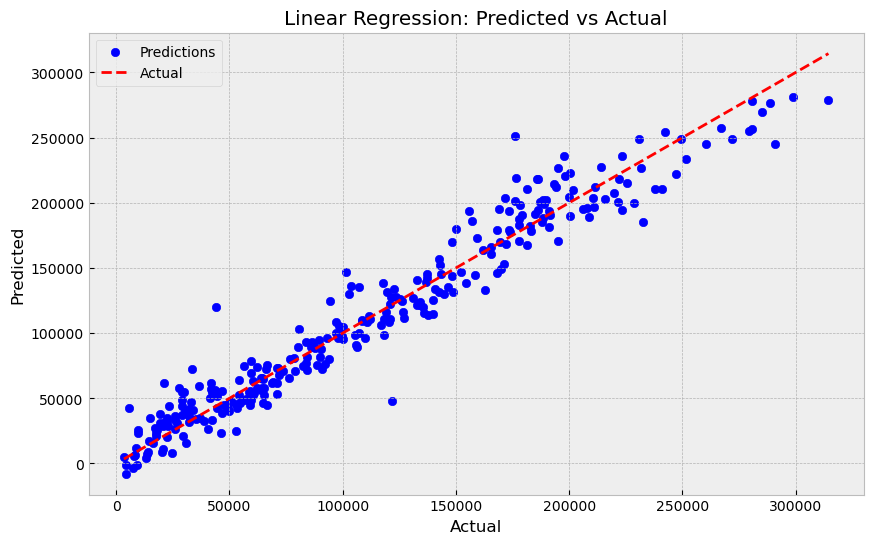

Linear Regression Model Metric Values
------------------
MAE on Test Set: 12794.23981082254
MSE on Test Set: 296086064.202173
R^2 Score on Test Set: 0.9458020721590914


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\1831997369.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


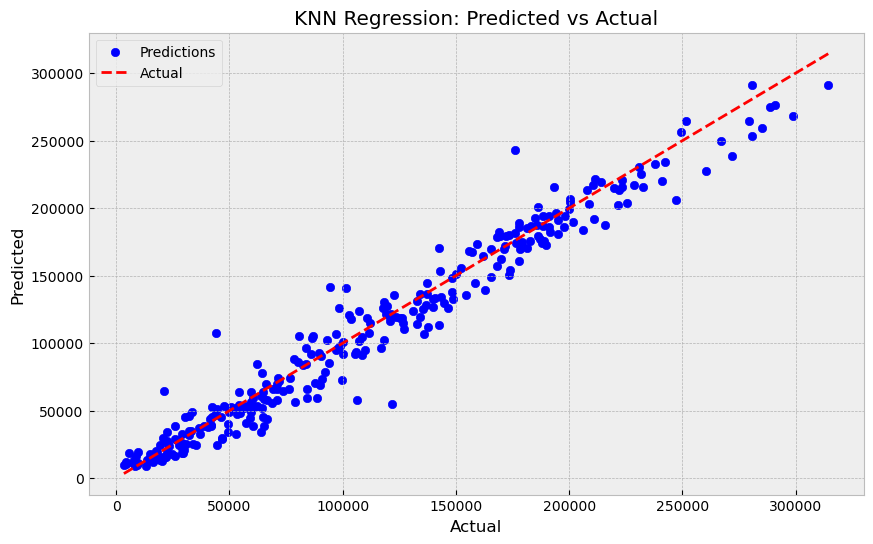

------------------
KNN Regression Model Metric Values
------------------
Best Parameters: {'model_knn__n_neighbors': 11, 'model_knn__weights': 'distance'}
MAE on Test Set: 10781.405627857814
MSE on Test Set: 224022258.5399402
R^2 Score on Test Set: 0.9589931993732249


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\399498032.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


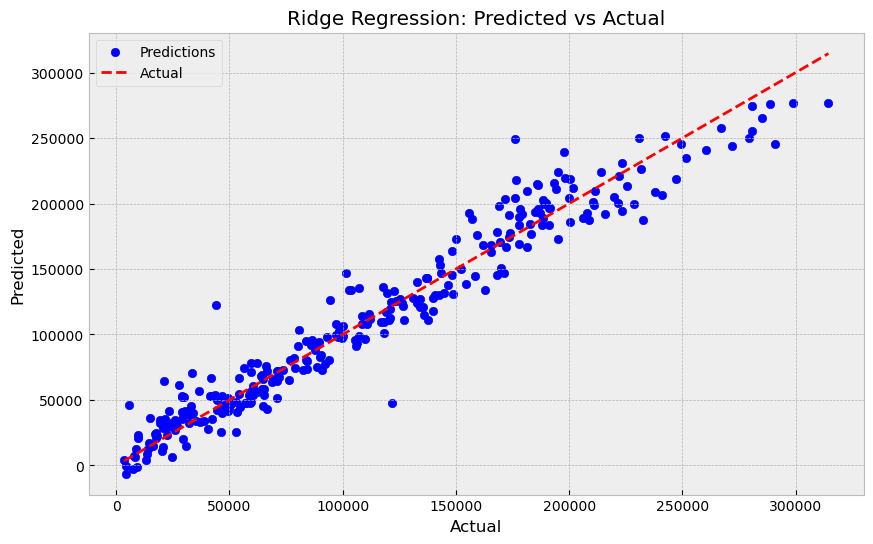

------------------
Ridge Regression Model Metric Values
------------------
Best Parameters: {'model_ridge__alpha': 100}
MAE on Test Set: 12770.613671980773
MSE on Test Set: 299820066.05316305
R^2 Score on Test Set: 0.9451185710175464


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\4077179469.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


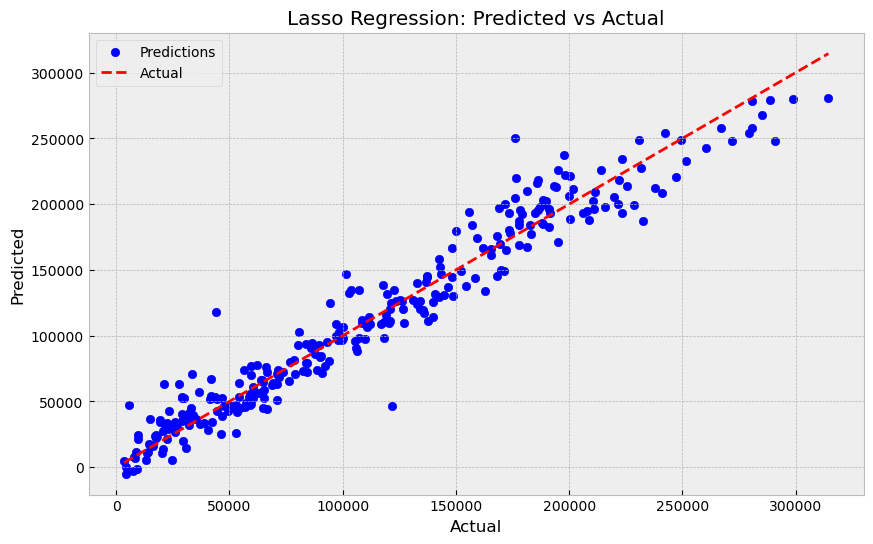

------------------
Lasso Regression Model Metric Values
------------------
Best Parameters: {'model_lasso__alpha': 100}
MAE on Test Set: 12779.059658016104
MSE on Test Set: 297446069.8643307
R^2 Score on Test Set: 0.9455531259989961


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\2697002821.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


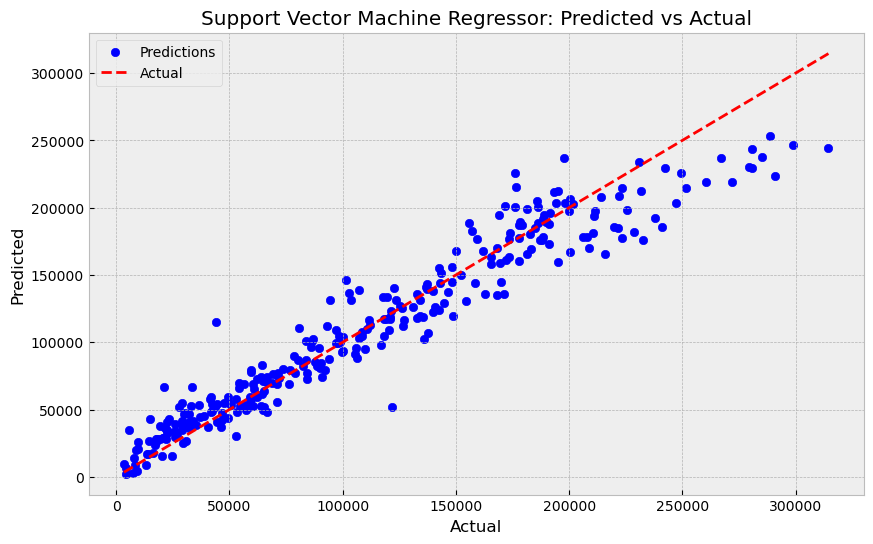

------------------
Support Vector Machine Regressor Model Metric Values
------------------
Best Parameters: {'model_svm__C': 10, 'model_svm__kernel': 'linear'}
MAE on Test Set: 14557.645648244914
MSE on Test Set: 411506974.45286113
R^2 Score on Test Set: 0.9246745186487466


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\1847365698.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


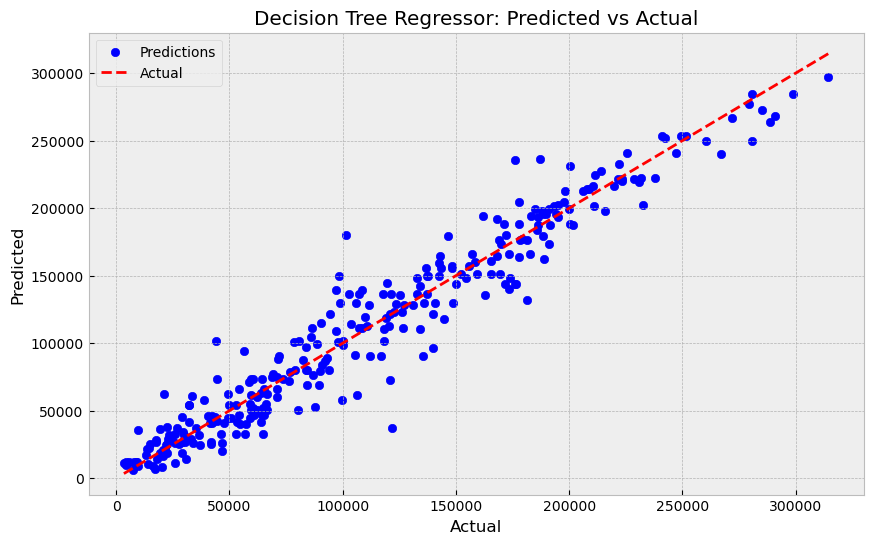

------------------
Decision Tree Regressor Model Metric Values
------------------
Best Parameters: {'model_dt__max_depth': None, 'model_dt__min_samples_leaf': 4, 'model_dt__min_samples_split': 10}
MAE on Test Set: 13261.782266103257
MSE on Test Set: 336755168.48769367
R^2 Score on Test Set: 0.9383576786333091


C:\Users\ramin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


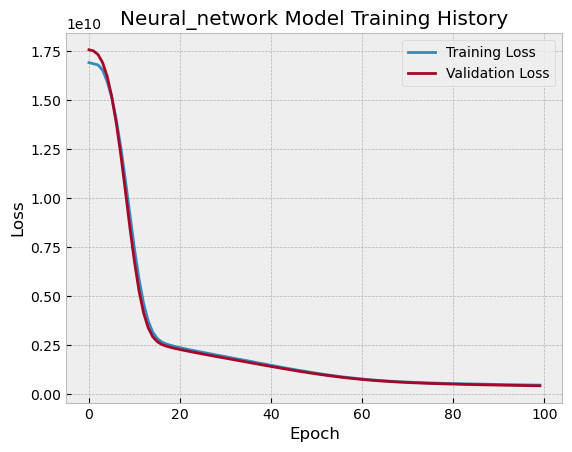

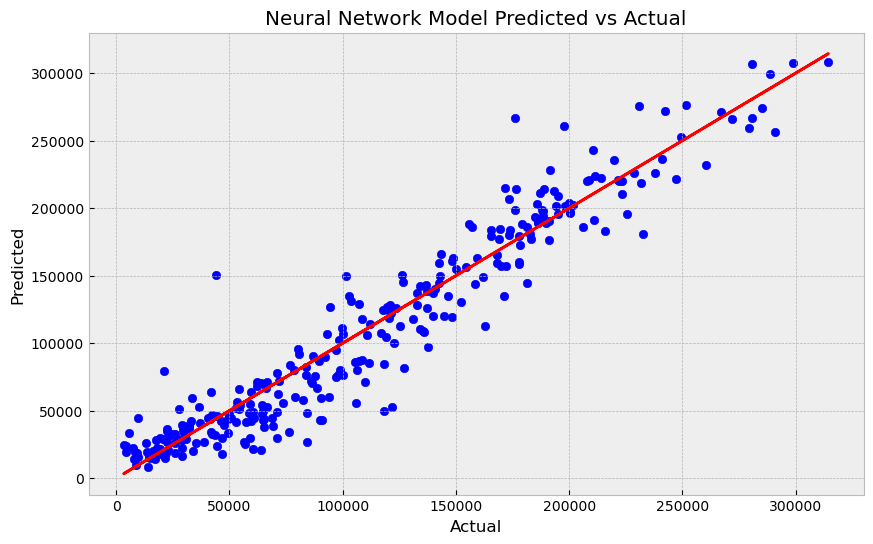

------------------
Neural Network Model Metric Values
------------------
MAE on Test Set: 15656.798059207016
MSE on Test Set: 472283273.9808971
R^2 Score on Test Set: 0.9135495455598114


C:\Users\ramin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


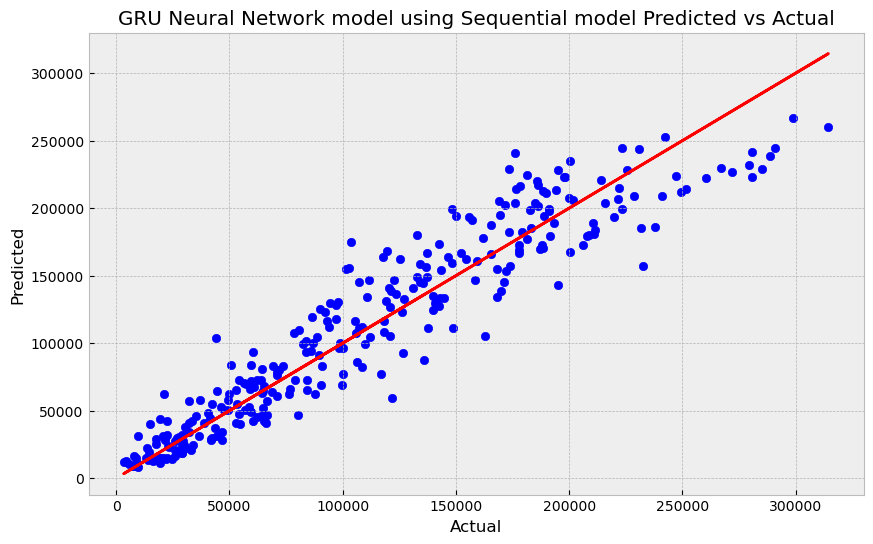

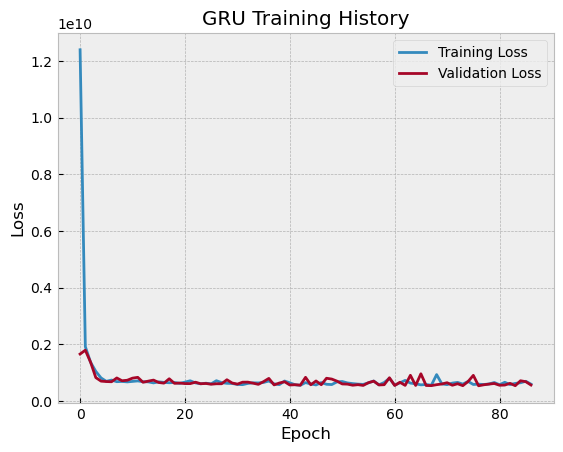

------------------
GRU Neural Network Model Metric Values
------------------
MAE on Test Set: 18605.309794955203
MSE on Test Set: 576158274.2043586
R^2 Score on Test Set: 0.8945354464607691


C:\Users\ramin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


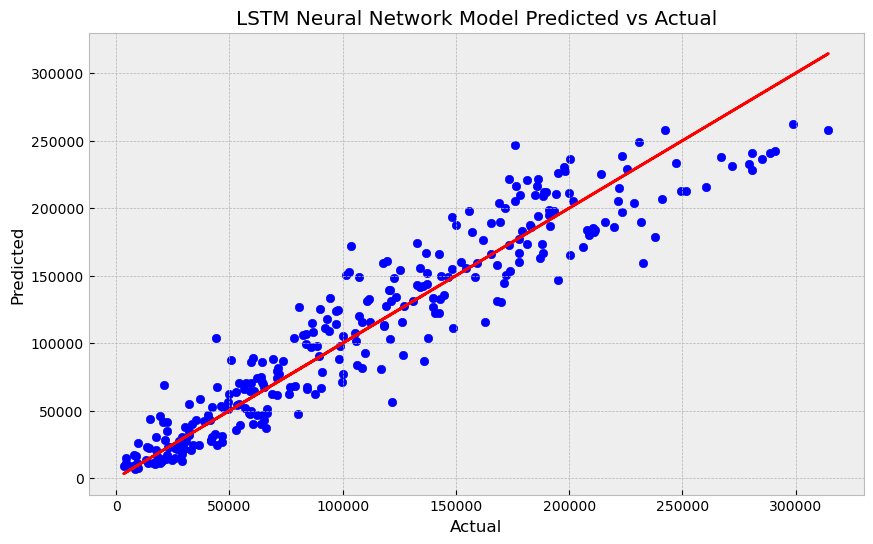

------------------
LSTM Neural Network Model Metric Values
------------------
MAE on Test Set: 18691.68562819966
MSE on Test Set: 573400561.3545278
R^2 Score on Test Set: 0.8950402399654678


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\1151538806.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


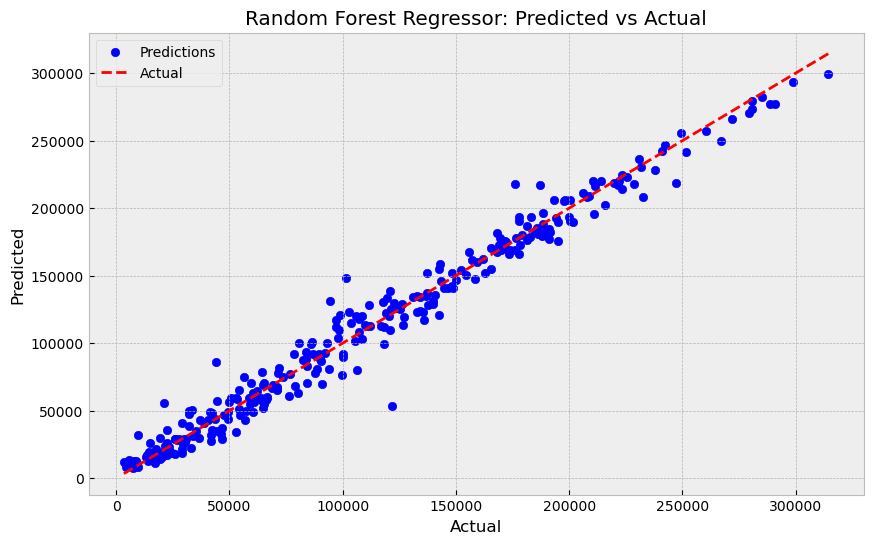

------------------
Random Forest Model Metric Values
------------------
Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
MAE on Test Set: 8139.914760611337
MSE on Test Set: 130904514.65478203
R^2 Score on Test Set: 0.9760382054507483


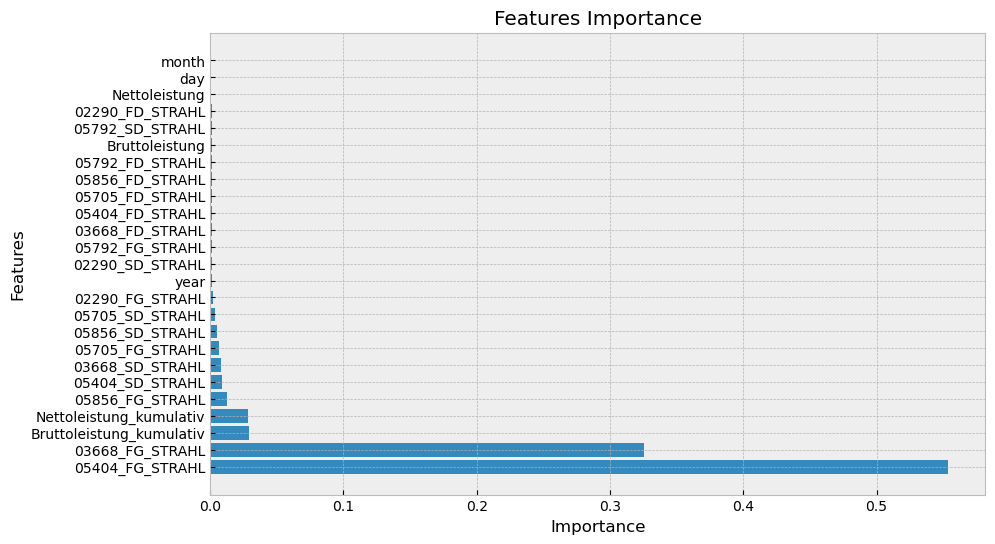

In [21]:
# apply models_func on train and test processed datasets
models_func(features_train_processed,target_train,features_test_processed,target_test)

In [22]:
# Linear Regression Model Metric Values
# ------------------
# MAE on Test Set: 12794.23981082254
# MSE on Test Set: 296086064.202173
# R^2 Score on Test Set: 0.9458020721590914

# KNN Regression Model Metric Values
# ------------------
# Best Parameters: {'model_knn__n_neighbors': 11, 'model_knn__weights': 'distance'}
# MAE on Test Set: 10781.405627857814
# MSE on Test Set: 224022258.5399402
# R^2 Score on Test Set: 0.9589931993732249

# Ridge Regression Model Metric Values
# ------------------
# Best Parameters: {'model_ridge__alpha': 100}
# MAE on Test Set: 12770.613671980773
# MSE on Test Set: 299820066.05316305
# R^2 Score on Test Set: 0.9451185710175464

# Lasso Regression Model Metric Values
# ------------------
# Best Parameters: {'model_lasso__alpha': 100}
# MAE on Test Set: 12779.059658016104
# MSE on Test Set: 297446069.8643307
# R^2 Score on Test Set: 0.9455531259989961

# Support Vector Machine Regressor Model Metric Values
# ------------------
# Best Parameters: {'model_svm__C': 10, 'model_svm__kernel': 'linear'}
# MAE on Test Set: 14557.645648244914
# MSE on Test Set: 411506974.45286113
# R^2 Score on Test Set: 0.9246745186487466

# Decision Tree Regressor Model Metric Values
# ------------------
# Best Parameters: {'model_dt__max_depth': None, 'model_dt__min_samples_leaf': 4, 'model_dt__min_samples_split': 10}
# MAE on Test Set: 13261.782266103257
# MSE on Test Set: 336755168.48769367
# R^2 Score on Test Set: 0.9383576786333091

# Neural Network model using TensorFlow Metric Values
# ------------------
# MAE on Test Set: 15981.900592603457
# MSE on Test Set: 478443345.4829022
# R^2 Score on Test Set: 0.9124219574996975

# GRU Neural Network Model Metric Values
# ------------------
# MAE on Test Set: 17939.2876506506
# MSE on Test Set: 558916872.0968314
# R^2 Score on Test Set: 0.8976914486516111

# LSTM Neural Network Model Metric Values
# ------------------
# MAE on Test Set: 19371.418523024207
# MSE on Test Set: 617885835.7261268
# R^2 Score on Test Set: 0.8868973045764903

# Random Forest Model Metric Values
# ------------------
# Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
# MAE on Test Set: 8139.914760611337
# MSE on Test Set: 130904514.65478203
# R^2 Score on Test Set: 0.9760382054507483

In [23]:
# adding pca step to pipelines 

In [24]:
# build column transformer pipeline

# instantiate continious columns for scaling
FG_list = [col for col in features_train.columns if 'FG' in col]
 
# instantiate transformer
transformer = [('pca', PCA(n_components=0.98),FG_list)]  

# insatntiate logistic and KNeighbors pipelines
column_transformer = ColumnTransformer(transformers=transformer)

In [25]:
def model_linear_pca(features_train, target_train, features_test, target_test):
    """
    Train a linear regression model with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Linear Regression model with grid search on the test data set   
    """
    
    # Instantiate linear regression
    model_lr = LinearRegression()
    scaler = StandardScaler()
    
    
    # Instantiate pipeline for linear regression with PCA
    pipeline_lr = Pipeline([('column_transformer',column_transformer),('scaler', scaler), ('model_lr', model_lr)])
    
    # Define grid search parameters
    search_space_grid = {
        'model_lr__fit_intercept': [True, False],  # Whether to calculate the intercept
        'model_lr__copy_X': [True, False]  # Whether to copy X before fitting
    }
    
    # Instantiate Gridsearch
    model_lr_grid = GridSearchCV(estimator=pipeline_lr,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',  # Use mean absolute error for evaluation
                                 cv=5,
                                 n_jobs=-1)
        
    # Fit the model
    model_lr_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_lr = model_lr_grid.predict(features_test)
    mae_lr = mean_absolute_error(target_test, target_test_pred_lr)
    mse_lr = mean_squared_error(target_test, target_test_pred_lr)
    r2_lr = r2_score(target_test, target_test_pred_lr)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_lr, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression with PCA: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_linear_regression_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Linear Regression Model with PCA Metric Values')
    print('------------------')
    print("MAE on Test Set:", mae_lr)
    print("MSE on Test Set:", mse_lr)
    print("R^2 Score on Test Set:", r2_lr)

In [26]:
def model_knn_pca(features_train, target_train, features_test, target_test):
    """
    Train a KNN model  with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained KNN model with gridsearch on the test data set      
    
    """
    
    # Instantiate KNN Regressor
    model_knn = KNeighborsRegressor()
    scaler = StandardScaler()
   
    
    # Instantiate pipeline for KNN Regressor with PCA
    pipeline_knn = Pipeline([('column_transformer',column_transformer),('scaler', scaler), ('model_knn', model_knn)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_knn__n_neighbors': [3, 5, 11],  # Number of neighbors to use
        'model_knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    }
    
    # Instantiate GridSearchCV
    model_knn_grid = GridSearchCV(estimator=pipeline_knn,
                                  param_grid=search_space_grid,
                                  scoring='neg_mean_absolute_error',
                                  cv=5,
                                  n_jobs=-1)
    
    # Fit the grid search model
    model_knn_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_knn = model_knn_grid.predict(features_test)
    mae_knn = mean_absolute_error(target_test, target_test_pred_knn)
    mse_knn = mean_squared_error(target_test, target_test_pred_knn)
    r2_knn = r2_score(target_test, target_test_pred_knn)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_knn, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('KNN Regression with PCA: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_knn_regression_predictions.png',dpi=300)
    plt.show()
    
    # Get the best parameters from the grid search
    best_params = model_knn_grid.best_params_
    
    print('------------------')
    print('KNN Regression Model with PCA Metric Values')
    print('------------------')
    print("Best Parameters:", best_params)
    
    print("MAE on Test Set:", mae_knn)
    print("MSE on Test Set:", mse_knn)
    print("R^2 Score on Test Set:", r2_knn)

In [27]:
def model_ridge_regression_pca(features_train, target_train, features_test, target_test):
    """
    Train a Ridge Regression model  with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Ridge Regression model using grid search on the test data set     
    
    """
    
    # Instantiate Ridge Regression model
    model_ridge = Ridge()
    scaler = StandardScaler()
    
    
    # Instantiate pipeline for Ridge Regression with PCA
    pipeline_ridge = Pipeline([('column_transformer',column_transformer),('scaler', scaler), ('model_ridge', model_ridge)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_ridge__alpha': [100, 500, 1000],  # Regularization strength
    }
    
    # Instantiate GridSearchCV
    model_ridge_grid = GridSearchCV(estimator=pipeline_ridge,
                                    param_grid=search_space_grid,
                                    scoring='neg_mean_absolute_error',
                                    cv=5,
                                    n_jobs=-1)
    
    # Fit the grid search model
    model_ridge_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_ridge = model_ridge_grid.predict(features_test)
    mae_ridge = mean_absolute_error(target_test,  target_test_pred_ridge)
    mse_ridge = mean_squared_error(target_test,  target_test_pred_ridge)
    r2_ridge = r2_score(target_test,  target_test_pred_ridge)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_ridge, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Ridge Regression with PCA: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_ridge_regression_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Ridge Regression Model with PCA Metric Values')
    print('------------------')
    
    print("Best Parameters:", model_ridge_grid.best_params_)
    print("MAE on Test Set:", mae_ridge)
    print("MSE on Test Set:",  mse_ridge)
    print("R^2 Score on Test Set:", r2_ridge)

In [28]:
def model_svm_pca(features_train, target_train, features_test, target_test):
    """
    Train a Support Vector Machine (SVM) model with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
        
    Output:
        Metric values for the trained Support Vector Machine (SVM) model using grid search on the test data set     
    
    """
    # Instantiate SVR
    model_svm = SVR()
    scaler = StandardScaler()
    
    
    # Instantiate pipeline for SVM with PCA
    pipeline_svm = Pipeline([('column_transformer',column_transformer),('scaler', scaler),('model_svm', model_svm)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_svm__C': [0.1, 1, 10],  # Regularization parameter
        'model_svm__kernel': ['linear', 'rbf'],  # Kernel type
    }
    
    # Instantiate GridSearchCV
    model_svm_grid = GridSearchCV(estimator=pipeline_svm,
                                  param_grid=search_space_grid,
                                  scoring='neg_mean_absolute_error',
                                  cv=5,
                                  n_jobs=-1)
    
    # Fit the grid search model
    model_svm_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_svm = model_svm_grid.predict(features_test)
    mae_svm = mean_absolute_error(target_test,  target_test_pred_svm)
    mse_svm = mean_squared_error(target_test,  target_test_pred_svm)
    r2_svm = r2_score(target_test,  target_test_pred_svm)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_svm, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('SVM Model with PCA: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_svm_regression_predictions.png',dpi=300)
    plt.show()
    
    print('------------------')
    print('Support Vector Machine Model with PCA Metric Values')
    print('------------------')
        
    print("Best Parameters:", model_svm_grid.best_params_)
    print("MAE on Test Set:", mae_svm)
    print("MSE on Test Set:",  mse_svm)
    print("R^2 Score on Test Set:", r2_svm)

In [29]:
def model_random_forest_pca(features_train, target_train, features_test, target_test):
    """
    Train a Random Forest Regressor model with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Random Forest Regressor model with gridsearch on the test data set      
    
    """
    # Instantiate Random Forest Regressor
    model_rf = RandomForestRegressor(random_state=42)
    
    # Instantiate PCA
    pca = PCA()
    
    # Instantiate pipeline_rf
    pipeline_rf = Pipeline([('column_transformer',column_transformer),('scaler', StandardScaler()),('model_rf', model_rf)])
    
    # Define the parameter grid
    search_space_grid = {
        'model_rf__n_estimators': [400, 500, 600],  # Number of trees in the forest
        'model_rf__max_depth': [10, 20,30]  # Maximum depth of the tree
    }
    
    # Instantiate GridSearchCV
    model_rf_grid = GridSearchCV(estimator=pipeline_rf,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',
                                 cv=5,
                                 n_jobs=-1)
    
    # Fit the grid search model
    model_rf_grid.fit(features_train, target_train)
    
    # Evaluate the model performance
    target_test_pred_rf = model_rf_grid.predict(features_test)
    mae_rf = mean_absolute_error(target_test, target_test_pred_rf)
    mse_rf = mean_squared_error(target_test, target_test_pred_rf)
    r2_rf = r2_score(target_test, target_test_pred_rf)
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, target_test_pred_rf, color='blue', label='Predictions')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest Model with PCA: Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_random_forest_regression_predictions.png',dpi=300)
    plt.show()
    
    # Get the best parameters from the grid search
    best_params = model_rf_grid.best_params_
    
    print('------------------')
    print('Random Forest Model with PCA Metric Values')
    print('------------------')
    
    print("Best Parameters:", best_params)
    
    print("MAE on Test Set:", mae_rf)
    print("MSE on Test Set:", mse_rf)
    print("R^2 Score on Test Set:", r2_rf)

In [30]:
def models_pca_func(features_train,target_train,features_test,target_test):
    """
    Train models with pca using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained models with grid search on the test data set   
    """
    
    # apply linear regression model with pca and gridsearch function on train and test datasets
    model_linear_pca(features_train, target_train, features_test, target_test)
    
    # apply knn regression model with pca and gridsearch function on train and test datasets
    model_knn_pca(features_train,target_train,features_test,target_test)
    
    # apply model_ridge_regression with pca and gridsearch function on train and test datasets
    model_ridge_regression_pca(features_train,target_train,features_test,target_test)
    
    # apply model support vector machine with pca and gridsearch function on train and test datasets
    model_svm_pca(features_train,target_train,features_test,target_test)
    
    # apply random forest with pca and gridsearch function on train and test datasets
    model_random_forest_pca(features_train,target_train,features_test,target_test)

C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\3258233325.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


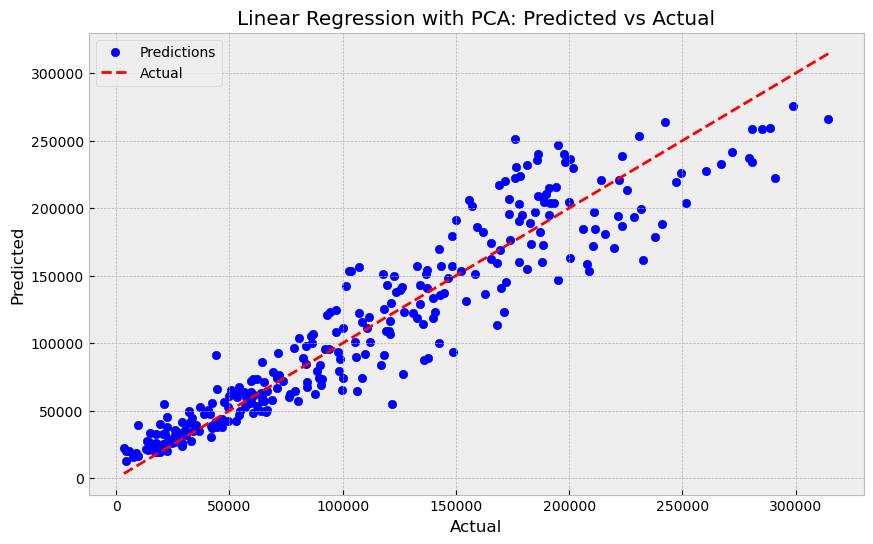

------------------
Linear Regression Model with PCA Metric Values
------------------
MAE on Test Set: 18601.07217868145
MSE on Test Set: 599873291.1847459
R^2 Score on Test Set: 0.8901944627589109


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\1896689350.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


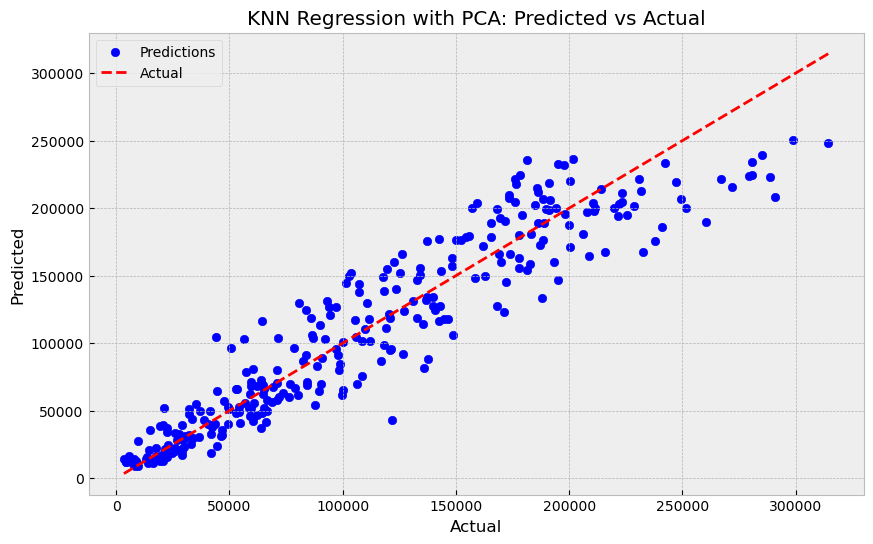

------------------
KNN Regression Model with PCA Metric Values
------------------
Best Parameters: {'model_knn__n_neighbors': 11, 'model_knn__weights': 'distance'}
MAE on Test Set: 19546.23677353154
MSE on Test Set: 663262906.7202444
R^2 Score on Test Set: 0.8785911277018783


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\2966496922.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


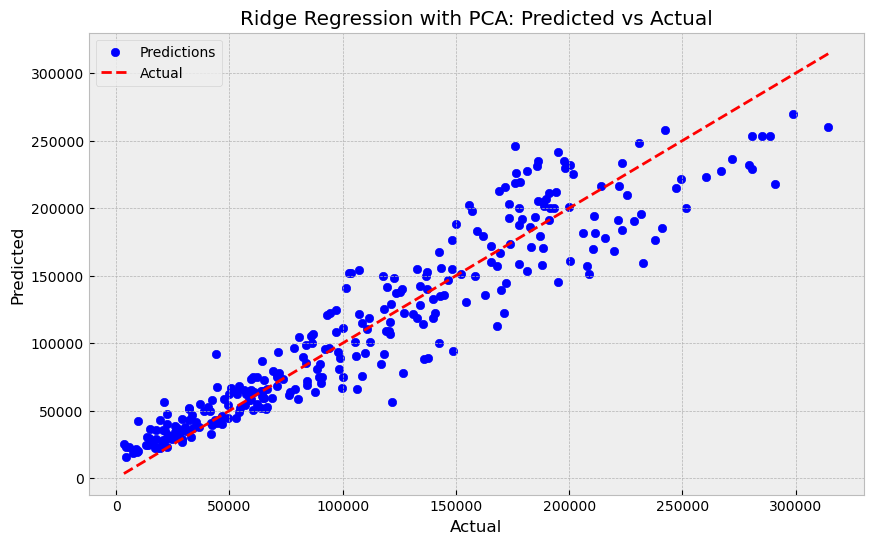

------------------
Ridge Regression Model with PCA Metric Values
------------------
Best Parameters: {'model_ridge__alpha': 100}
MAE on Test Set: 18716.251962159193
MSE on Test Set: 600307298.2344186
R^2 Score on Test Set: 0.8901150186863775


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\1877342737.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


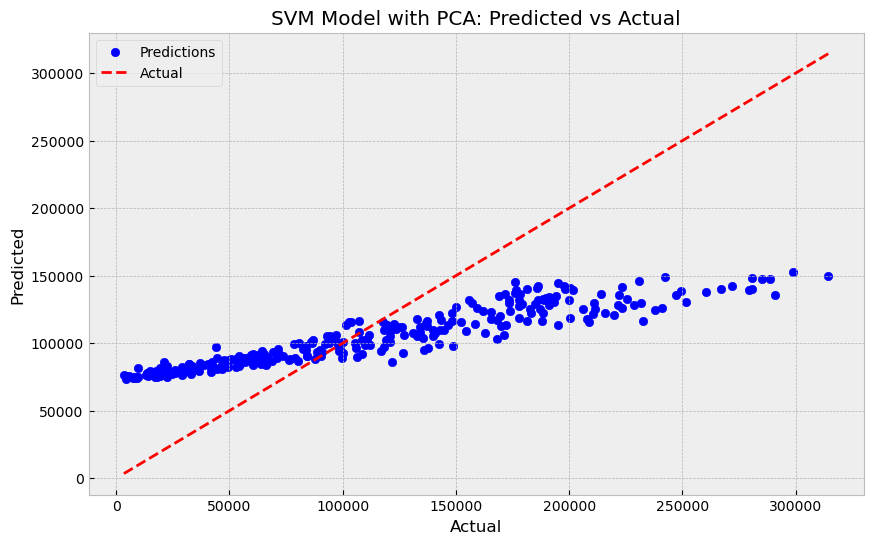

------------------
Support Vector Machine Model with PCA Metric Values
------------------
Best Parameters: {'model_svm__C': 10, 'model_svm__kernel': 'linear'}
MAE on Test Set: 44974.49270344915
MSE on Test Set: 3011648972.4043183
R^2 Score on Test Set: 0.4487240251298602


C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\515088287.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2, color='red', label='Actual')


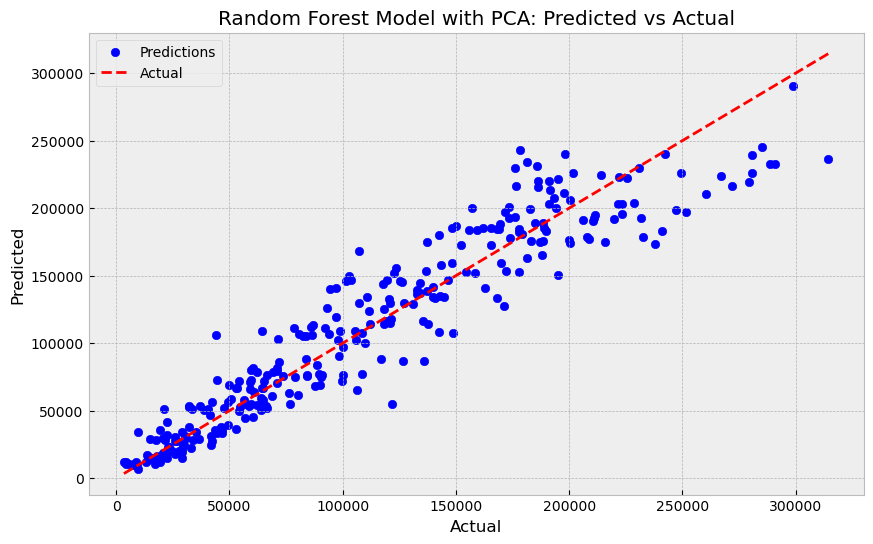

------------------
Random Forest Model with PCA Metric Values
------------------
Best Parameters: {'model_rf__max_depth': 10, 'model_rf__n_estimators': 500}
MAE on Test Set: 17766.608397437223
MSE on Test Set: 565926050.7403398
R^2 Score on Test Set: 0.8964084333250758


In [31]:
models_pca_func(features_train_processed,target_train,features_test_processed,target_test)

In [32]:
# PCA results demonstrated that pca step did not improve the model behaviour 
# features selection will be made as second step of modelling process
features_selection = ['year','05705_SD_STRAHL','05856_SD_STRAHL','05705_FG_STRAHL','03668_SD_STRAHL','05404_SD_STRAHL','05856_FG_STRAHL',
                      'Bruttoleistung_kumulativ', 'Nettoleistung_kumulativ','03668_FG_STRAHL','05404_FG_STRAHL']

# instantiate features_train_eng and features_test_eng
features_train_eng = features_train_processed[features_selection]
features_test_eng = features_test_processed[features_selection]

# instantiate features_aim_processed and features_aim_eng
features_aim_processed = date(features_aim)
features_aim_eng = features_aim_processed[features_selection]

In [33]:
# apply best model on features_selection
def model_random_forest_best(features_train, target_train, features_test, target_test):
    """
    Train a Random Forest Regressor model using grid search and evaluate its performance.
    
    Args:
        features_train (pd.DataFrame): Training features DataFrame
        target_train (pd.Series): Training target Series
        features_test (pd.DataFrame): Test features DataFrame
        target_test (pd.Series): Test target Series
        
    Output:
        Metric values for the trained Random Forest Regressor model with gridsearch on the test data set      
    
    """
    # Instantiate Random Forest Regressor
    model_rf = RandomForestRegressor(random_state=42)
    
    # Define the parameter grid
    search_space_grid = {
        'n_estimators': [800, 1000, 1200],  # Number of trees in the forest
        'max_depth': [None, 10, 20]  # Maximum depth of the tree
    }
    
    # Instantiate GridSearchCV
    model_rf_grid = GridSearchCV(estimator=model_rf,
                                 param_grid=search_space_grid,
                                 scoring='neg_mean_absolute_error',
                                 cv=5,
                                 n_jobs=-1)
    
    # Fit the grid search model
    model_rf_grid.fit(features_train, target_train)
    
    return model_rf_grid

In [34]:
# instantiate best model pickle
import pickle
file_name = "bestmodel.pkl"
pickle.dump(model_random_forest_best(features_train_eng, target_train, features_test_eng, target_test),open(file_name,"wb"))

In [35]:
# instantiate best model variable
best_model = pickle.load(open(file_name,"rb"))

In [40]:
def model_evaluation(model,features,target):
    
# Evaluate the model performance
    target_pred_rf = model.predict(features)
    mae_rf = mean_absolute_error(target, target_pred_rf)
    mse_rf = mean_squared_error(target, target_pred_rf)
    r2_rf = r2_score(target, target_pred_rf)

    if features.equals(features_test_eng):
        title = "Test"
    else:
        title = "Aim"
    
    # Plot the predictions on test data
    plt.figure(figsize=(10, 6))
    plt.scatter(target, target_pred_rf, color='blue', label='Predictions')
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2, color='red', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest Regressor: Predicted vs Actual on {} DataFrame'.format(title))
    plt.legend()
    plt.grid(True)
    plt.savefig('random_forest_best_model_predictions_{}.png'.format(title),dpi=300)
    plt.show()
    
    # Get the best parameters from the grid search
    best_params = model.best_params_
       
    print('------------------')
    print('Random Forest Model Metric Values on {} DataFrame'.format(title))
    print('------------------')
    print("Best Parameters:", best_params)
    
    print("MAE on {} DataFrame:".format(title), mae_rf)
    print("MSE on {}  DataFrame:".format(title), mse_rf)
    print("R^2 Score on {} DataFrame:".format(title), r2_rf)
    
    # Plot feature importances
    feature_importances = model.best_estimator_.feature_importances_
    feature_names = features.columns
    importance_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Features'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Features Importance')
    plt.savefig('random_forest_Best_model_Features_Importance{}.png'.format(title),dpi=300)
    plt.show()

C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\2201580666.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2, color='red', label='Actual')


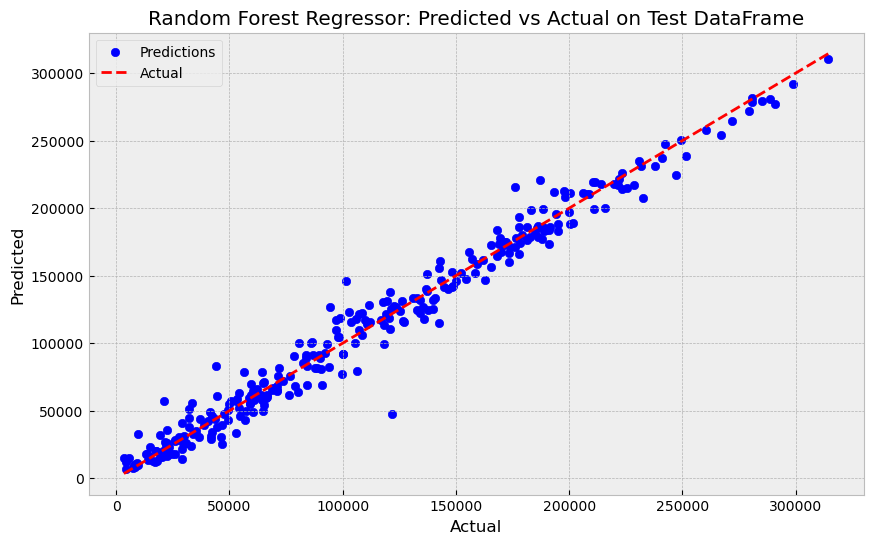

------------------
Random Forest Model Metric Values on Test DataFrame
------------------
Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
MAE on Test DataFrame: 8218.073201518915
MSE on Test  DataFrame: 134578316.46922475
R^2 Score on Test DataFrame: 0.9753657237985722


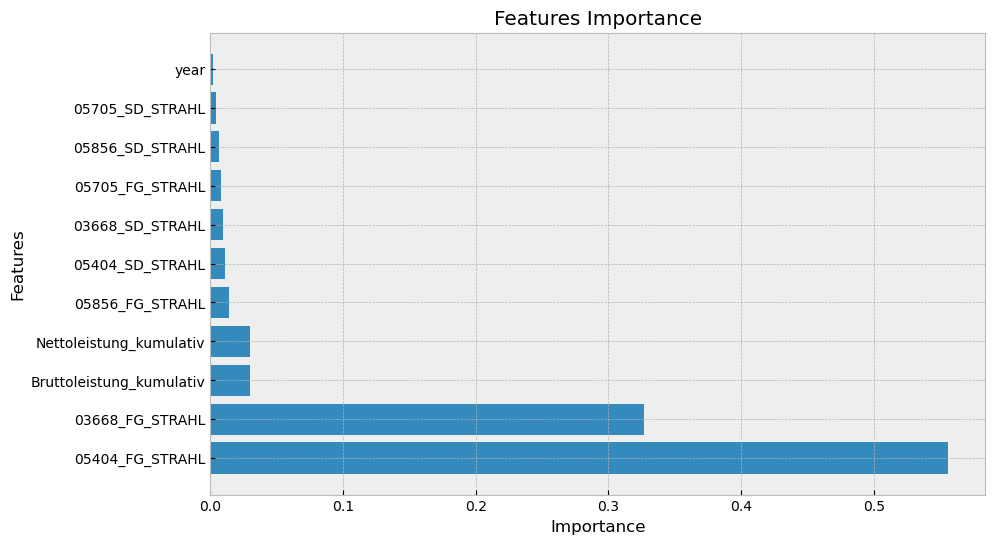

In [41]:
# instantiate best model 
model_evaluation(best_model,features_test_eng,target_test)

C:\Users\ramin\AppData\Local\Temp\ipykernel_23268\2201580666.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2, color='red', label='Actual')


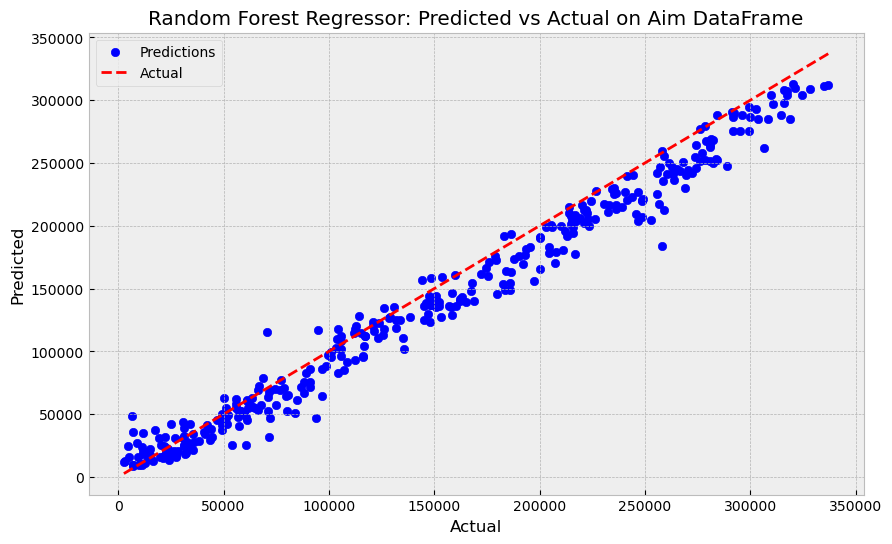

------------------
Random Forest Model Metric Values on Aim DataFrame
------------------
Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
MAE on Aim DataFrame: 13882.042851676792
MSE on Aim  DataFrame: 315562325.29732734
R^2 Score on Aim DataFrame: 0.9661381124284202


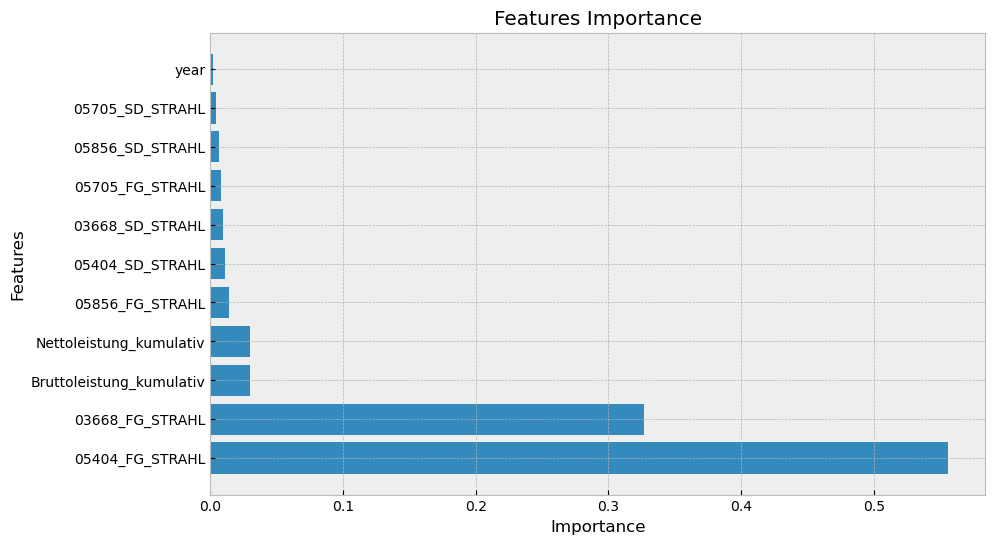

In [42]:
model_evaluation(best_model,features_aim_eng,target_aim)

In [45]:
#------------------
# Random Forest Model Metric Values on Test DataFrame
#------------------
# Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
# MAE on Test DataFrame: 8218.073201518915
# MSE on Test  DataFrame: 134578316.46922475
# R^2 Score on Test DataFrame: 0.9753657237985722

# Random Forest Model Metric Values on Aim DataFrame
# ------------------
# Best Parameters: {'max_depth': 20, 'n_estimators': 1200}
# MAE on Aim DataFrame: 13882.042851676792
# MSE on Aim  DataFrame: 315562325.29732734
# R^2 Score on Aim DataFrame: 0.9661381124284202
# based on aim dataframe metric values,our best model can explain over 97.5% variance of target column 
#  our best can be good for predictions of target column for a limited time